# [CPSC 222](https://github.com/GonzagaCPSC222) Intro to Data Science
[Gonzaga University](https://www.gonzaga.edu/)

[Gina Sprint](http://cs.gonzaga.edu/faculty/sprint/)

# Intro to Natural Language Processing
What are our learning objectives for this lesson?
* Gain an overview of the field of NLP
* Install several Python libraries for natural language processing
* Perform common text processing and analyses with the textblob module, including
    * Parts of speech tagging
    * Sentiment analysis
    * Stemming and lemmatization
    * Etc.
* Visualize word frequencies with bar charts and word clouds
* Compute and interpret Readability statistics
* Perform named entity recognition
* Calculate document similarity

Content used in this lesson is based upon information in the following sources:
* Intro to Python for Computer Science and Data Science by Deitel and Deitel

## Warm-up Task(s)
1. Please go to Zagweb and complete the course evaluation for this class
    * I would greatly appreciate a 100% response rate from all of you!!
1. If you are interested in using natural language processing (NLP) for text data in your project...
    * Follow the instructions for installing NLP libraries below
    * Download today's notebook, run it, and try some of the tasks 🤓

## Today
* Announcements
    * MA14 is due today (last one!!)
    * IQ10 (last one!!) on U7/DA7 (no NLP) next class
    * DA7 is due Sunday night. Questions?
    * Mid project check-ins due TBD (Cleaning, EDA, and at least 1 hypothesis test)
        * Project is due 1 week from today and will be entered into gradebook as DA8
        * Questions?
* Course evals
* Confusion matrices, NLP Yelp API demo, closing thoughts
* Next class (last one!!): final exam review, IQ10, last chance for mid-project check-ins

## Install NLP Libraries
* There are some NLP libraries we are going to use that don't come with Anaconda, so we will need to install them separately
* Open Anaconda prompt and install the following modules:
    * textblob
        * `pip install textblob`
        * `python -m textblob.download_corpora`
    * wordcloud
        * `pip install wordcloud`
    * textatistic
        * `pip install textatistic`
    * spaCy
        * `pip install spacy`
        * `python -m spacy download en_core_web_sm`
        
Notes:
* On Windows you may need to right click on Anaconda prompt in the start menu and choose "More" -> "Run as administrator"
* On Mac M1, `spacy` will install but is not currently running on the arm architecture (for this reason I'll be using Google Colab or my older Intel-based Mac instead)
* If pip cannot find the package you can try conda, e.g.: `conda install -c conda-forge spacy`

## Intro to Natural Language Processing
* Natural language processing (NLP) is the processing of a text collection (AKA corpus, or corpora for plural corpus), such as
    * Tweets
    * Facebook posts
    * Conversations
    * Product/service reviews
    * Meeting logs
    * Etc. 
* NLP is notoriously difficult because all of the above examples lack mathematical precision. A text's meaning can be influenced by context and perspective.
* Thankfully, there are some really great Python NLP libraries with lots of built-in functionality and trained machine learning models we can use!!
    * TextBlob
    * WordCloud
    * Textastatistic
    * spaCy
    * Gensim
    * Google Cloud Natural Language API
    * Microsoft Linguistic Analysis API
    * etc.
* These libraries are really useful for various uses cases. An example would be text cleaning:
    * Applying common string operations, like converting all the text to lower case
    * Fixing misspelled words
    * Performing normalization using stemming, lemmatization, inflection, etc.
    * Handling contractions
    * Removing stop words
* More use cases below!

## Basic NLP Tasks w/TextBlob
TextBlob is an OOP NLB text-processing library built on NLTK and pattern NLP libraries that simplifies many of the capabilities of these libraries, including but not limited to:
1. Tokenization: splitting text into pieces called tokens, which are meaningful units, such as words and numbers
1. Parts-of-speech tagging: identifying each word's part of speech, such as noun, verb, adjective, etc.
1. Noun phrase extraction: locating groups of words that represent nouns, such as "red brick factory"
1. Sentiment analysis: determining whether text has positive, neutral, or negative sentiment
1. Inter-language translation and language detection: powered by [Google Translate](https://translate.google.com/)
1. Inflection: pluralizing and singularizing words
1. Spell checking and spelling correction
1. Stemming: reducing words to their stems by removing prefixes or suffixes. For example, the stem of "varieties" is "varieti"
1. Lemmatization: like stemming, but produces real words based on the original words' context. For example, the lemmatization of "varieties" is "variety"
1. Word frequencies: determining how often each word appears in a corpus
1. WordNet integration: WordNet is a database used to find word definitions, synonyms, and antonyms
1. Stop word elimination: removing common words, such as "a", "an", "the", "I", "we", "you", and more to analyze the important words in a corpus
1. n-grams: producing sets of consecutive words in a corpus for use in identifying words that frequently appear adjacent to one another

In [1]:
from textblob import TextBlob

In [2]:
# grabbing text from https://www.gonzaga.edu/catalogs/current/undergraduate/school-of-engineering-and-applied-science/computer-science
gu_cs_text = "The Computer Science program at Gonzaga prepares students for careers and graduate study in the practice and science of computing. The program is built on a broad and rigorous foundation of science, mathematics, software engineering, and advanced computer science topics."
blob = TextBlob(gu_cs_text)
print(blob.sentences)
print(blob.words)

[Sentence("The Computer Science program at Gonzaga prepares students for careers and graduate study in the practice and science of computing."), Sentence("The program is built on a broad and rigorous foundation of science, mathematics, software engineering, and advanced computer science topics.")]
['The', 'Computer', 'Science', 'program', 'at', 'Gonzaga', 'prepares', 'students', 'for', 'careers', 'and', 'graduate', 'study', 'in', 'the', 'practice', 'and', 'science', 'of', 'computing', 'The', 'program', 'is', 'built', 'on', 'a', 'broad', 'and', 'rigorous', 'foundation', 'of', 'science', 'mathematics', 'software', 'engineering', 'and', 'advanced', 'computer', 'science', 'topics']


### Parts of Speech Tagging

In [3]:
# POS tagging
print(blob.tags)
# tagset list with examples available here: https://medium.com/@gianpaul.r/tokenization-and-parts-of-speech-pos-tagging-in-pythons-nltk-library-2d30f70af13b

[('The', 'DT'), ('Computer', 'NNP'), ('Science', 'NNP'), ('program', 'NN'), ('at', 'IN'), ('Gonzaga', 'NNP'), ('prepares', 'VBZ'), ('students', 'NNS'), ('for', 'IN'), ('careers', 'NNS'), ('and', 'CC'), ('graduate', 'NN'), ('study', 'NN'), ('in', 'IN'), ('the', 'DT'), ('practice', 'NN'), ('and', 'CC'), ('science', 'NN'), ('of', 'IN'), ('computing', 'VBG'), ('The', 'DT'), ('program', 'NN'), ('is', 'VBZ'), ('built', 'VBN'), ('on', 'IN'), ('a', 'DT'), ('broad', 'JJ'), ('and', 'CC'), ('rigorous', 'JJ'), ('foundation', 'NN'), ('of', 'IN'), ('science', 'NN'), ('mathematics', 'NNS'), ('software', 'NN'), ('engineering', 'NN'), ('and', 'CC'), ('advanced', 'VBD'), ('computer', 'NN'), ('science', 'NN'), ('topics', 'NNS')]


In [4]:
# task
# display parts of speech tags for "My dog is cute"

#### Noun Phrases

In [5]:
# noun phrases
print(blob.noun_phrases)

['computer', 'science program', 'gonzaga', 'graduate study', 'rigorous foundation', 'software engineering', 'computer science topics']


In [6]:
# task
# show the noun phrases for the sentence "The red brick factory is for sale"

### Sentiment Analysis

In [7]:
# sentiment analysis
for sentence in blob.sentences:
    print(sentence)
    print(sentence.sentiment)
    print()
# polarity indicates sentiment in [-1.0 (negative), 1.0 (positive)] 0.0 is neutral
# subjectivity in [0.0 (objective), 1.0 (subjective)]

The Computer Science program at Gonzaga prepares students for careers and graduate study in the practice and science of computing.
Sentiment(polarity=0.0, subjectivity=0.0)

The program is built on a broad and rigorous foundation of science, mathematics, software engineering, and advanced computer science topics.
Sentiment(polarity=0.23125, subjectivity=0.45625)



In [8]:
# task
# show sentiment analysis for "The food is not good", "The movie was not bad", "The movie was excellent!"
from textblob import Sentence

### Inter-language Translation and Language Detection

In [9]:
# language detection/translatiom with textblob is now deprecated:
# https://textblob.readthedocs.io/en/dev/api_reference.html?highlight=detect_language#textblob.blob.TextBlob.detect_language
# Deprecated since version 0.16.0: Use the official Google Translate API instead.
# link to learn more about Google Translate API: https://cloud.google.com/translate

### Inflection

In [10]:
# inflection
# inflections are different forms of the same words, such as singular and plural
# e.g. person and people
# and different verb tenses
# e.g. run and ran

# often want to convert all inflected words into same form for more accurate word frequencies

from textblob import Word

index = Word("index")
print(index.pluralize())
fish = Word("fish")
print(fish.pluralize())
cacti = Word("cacti")
print(cacti.singularize())

wordlist = blob.words
wordlist.pluralize()

indices
fish
cactus


WordList(['Thes', 'Computers', 'Sciences', 'programs', 'ats', 'Gonzagas', 'preparess', 'studentss', 'fors', 'careerss', 'ands', 'graduates', 'studies', 'ins', 'thes', 'practices', 'ands', 'sciences', 'ofs', 'computings', 'Thes', 'programs', 'iss', 'builts', 'ons', 'some', 'broads', 'ands', 'rigorouss', 'foundations', 'ofs', 'sciences', 'mathematics', 'software', 'engineerings', 'ands', 'advanceds', 'computers', 'sciences', 'topicss'])

In [11]:
# task
# singularize "children" and pluralize "focus"

### Spell Checking and Spelling Correction

In [12]:
# spell checking
word = Word("theyr")
print(word.spellcheck())

# spell correction
print(word.correct()) # returns correctly spelled word that has the highest confidence
print(TextBlob("Ths sentense has missplled wrds.").correct())

[('they', 0.5713042216741622), ('their', 0.42869577832583783)]
they
The sentence has misspelled words.


In [13]:
# task
# correct the spelling in "I canot beleive I misspeled thees werds"

### Stemming and Lemmatization

In [14]:
# normalization: preparing words for analysis
# e.g. convert all words to lowercase, convert to word roots, etc.
# e.g. "program", "programs", "programmer", "programming", "programmed", "progammes" -> "program"

# stemming removes a prefix or suffix from a word leaving only a stem (which may or may not be a real word)
word = Word("varieties")
print(word.stem())

varieti


In [15]:
# lemmatization is like stemming but factors in the word's part of speech and meaning thus resulting in a real word
print(word.lemmatize())

variety


In [16]:
# task
# stem and lemmatize "strawberries"

### Word Frequencies

In [17]:
# word frequencies 
print(blob.word_counts["science"])

4


### Definitions, Synonyms, and Antonyms w/WordNet

In [18]:
# definitions
# uses WordNet database from Princeton U
# has word definitions, synonyms, and antonyms
word = Word("happy")
print(word.definitions)

['enjoying or showing or marked by joy or pleasure', 'marked by good fortune', 'eagerly disposed to act or to be of service', 'well expressed and to the point']


In [19]:
# synonyms
print(word.synsets)
# word.part of speech.index number of the corresponding meaning in the WordNet database

synonyms = set()
for synset in word.synsets:
    for lemma in synset.lemmas():
        synonyms.add(lemma.name())
print("synonyms:", synonyms)

[Synset('happy.a.01'), Synset('felicitous.s.02'), Synset('glad.s.02'), Synset('happy.s.04')]
synonyms: {'felicitous', 'happy', 'glad', 'well-chosen'}


In [20]:
# antonyms
antonyms = set()
for lemma in word.synsets[0].lemmas():
    for antonym in lemma.antonyms():
        antonyms.add(antonym.name())
print("antonyms:", antonyms)

antonyms: {'unhappy'}


### Stop Words
A stop word is a common word in text that is often removed from text before analyzing because they typically do not provide useful information (e.g. "a", "the", "you", etc.)

In [21]:
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
stops = stopwords.words("english")

# remove stop words
no_stops_cs_text = []
for word in blob.words:
    if word not in stops:
        no_stops_cs_text.append(word)
print(no_stops_cs_text)

['The', 'Computer', 'Science', 'program', 'Gonzaga', 'prepares', 'students', 'careers', 'graduate', 'study', 'practice', 'science', 'computing', 'The', 'program', 'built', 'broad', 'rigorous', 'foundation', 'science', 'mathematics', 'software', 'engineering', 'advanced', 'computer', 'science', 'topics']


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sprint/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### N-Grams

In [22]:
# n-grams
# an n-gram is a sequence of n text items, such as letters in words or words in a sentence
# used to identify letters or words that frequently appear adjacent to one another
# helpful for predicting the next letter or word the user will type
# e.g. tab completion in an IDE or text suggestion in a messaging app
blob.ngrams(5) # default is 3-gram

[WordList(['The', 'Computer', 'Science', 'program', 'at']),
 WordList(['Computer', 'Science', 'program', 'at', 'Gonzaga']),
 WordList(['Science', 'program', 'at', 'Gonzaga', 'prepares']),
 WordList(['program', 'at', 'Gonzaga', 'prepares', 'students']),
 WordList(['at', 'Gonzaga', 'prepares', 'students', 'for']),
 WordList(['Gonzaga', 'prepares', 'students', 'for', 'careers']),
 WordList(['prepares', 'students', 'for', 'careers', 'and']),
 WordList(['students', 'for', 'careers', 'and', 'graduate']),
 WordList(['for', 'careers', 'and', 'graduate', 'study']),
 WordList(['careers', 'and', 'graduate', 'study', 'in']),
 WordList(['and', 'graduate', 'study', 'in', 'the']),
 WordList(['graduate', 'study', 'in', 'the', 'practice']),
 WordList(['study', 'in', 'the', 'practice', 'and']),
 WordList(['in', 'the', 'practice', 'and', 'science']),
 WordList(['the', 'practice', 'and', 'science', 'of']),
 WordList(['practice', 'and', 'science', 'of', 'computing']),
 WordList(['and', 'science', 'of', 'co

In [23]:
# task
# produce n-grams of 3 words for "TextBlob is easy to use."

## NLP Use Case: Visualizing Word Frequencies
Word frequencies are typically visualied with bar charts and word clouds

### Bar Charts

['computer', 'science', 'program', 'gonzaga', 'prepare', 'student', 'career', 'graduate', 'study', 'practice', 'science', 'computing', 'program', 'built', 'broad', 'rigorou', 'foundation', 'science', 'mathematics', 'software', 'engineering', 'advanced', 'computer', 'science', 'topic']


/var/folders/xq/gg44p4b95tl51sf74rbthlj40000gn/T/ipykernel_74170/1976901859.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap("viridis", len(counts_ser))


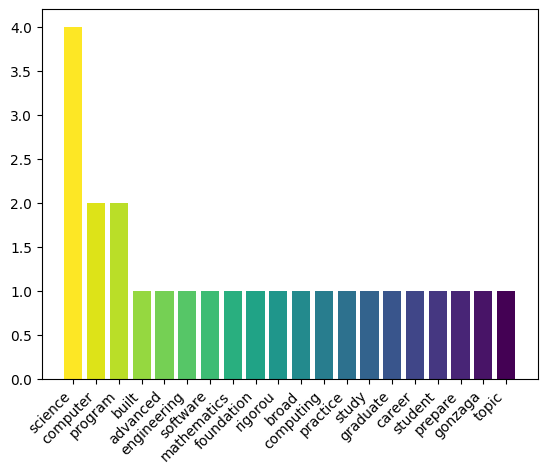

In [24]:
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd

# word frequencies demo
# clean first 
blob = TextBlob(gu_cs_text.lower())
cleaned_cs_text = []
for word in blob.words:
    # remove stop words and contractions
    if word not in stops and "'" not in word:
        # get roots of words
        word = word.singularize()
        word = word.lemmatize()
        cleaned_cs_text.append(word)
print(cleaned_cs_text)
cleaned_blob = TextBlob(" ".join(cleaned_cs_text))
counts_ser = pd.Series(cleaned_blob.word_counts)
counts_ser = counts_ser.sort_values(ascending=False)

viridis = cm.get_cmap("viridis", len(counts_ser))
plt.bar(counts_ser.index, counts_ser, color=viridis.colors[::-1])
plt.xticks(rotation=45, horizontalalignment="right")
plt.show()

### Word Clouds
This solution uses the `wordcloud` module which is built on top of `matplotlib`. Words that appear more frequently in the text show up in a word cloud in a larger font size.
* Note: `wordcloud` removes stop words before generating the word cloud

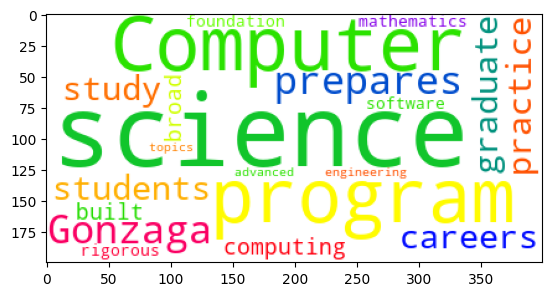

In [25]:
from wordcloud import WordCloud
plt.figure()
wordcloud = WordCloud(colormap="prism", background_color="white")
wordcloud = wordcloud.generate(gu_cs_text)
# write to file
#wordcloud.to_file("wordcloud.png")
# plot with matplotlib
plt.imshow(wordcloud)
plt.show()

## NLP Use Case: Readability Assessment w/Textatistic
Text readability is affected by the vocabulary used, sentence structure, sentence length, topic, etc. There are many formulas for assessing readability:
* char_count: number of characters in the text
* word_count: number of words in the text
* sent_count: number of sentences in the text
* sybl_count: number of syllables in the text
* notdalechall_count: count of words that are not on the Dale-Chall list (list of words understood by 80% of 5th graders); higher this number is compared to the total word count, the less readable the text is considered to be
* polysyblword_count: number of words with three or more syllables
* flesch_score: Flesch Reading Ease score, which can be mapped to a grade level (scores > 90 are readable by 5th graders; scores < 30 require a college degree)
* fleschkincaid_score: Flesch-Kincaid score, which corresponds to a specific grade level
* gunningfog_score: Gunning Fog index value, which corresponds to a specific grade level
* smog_score: Simple Measure of Gobbledygook (SMOG), which corresponds to the years of education requried to understand text
* dalechall_score: Dale-Chall score, which can be mapped to grade levels from 4 and below to college graduate (grade 16) and above
    * Note: this score is considered to be most reliable for a broad range of text types

In [26]:
from textatistic import Textatistic

readability = Textatistic(gu_cs_text)
for stat, value in readability.dict().items():
    print(stat, ":", value) 
print()

# calculate the average number of words per sentence, characters per word, and syllables per word
print("Average number of words per sentence:", readability.word_count / readability.sent_count)
print("Average characters per word:", readability.char_count / readability.word_count)
print("Average syllables per word:", readability.sybl_count / readability.word_count)

char_count : 232
word_count : 40
sent_count : 2
sybl_count : 69
notdalechall_count : 20
polysyblword_count : 6
flesch_score : 40.60000000000002
fleschkincaid_score : 12.565000000000005
gunningfog_score : 14.0
smog_score : 13.023866798666859
dalechall_score : 12.523499999999999

Average number of words per sentence: 20.0
Average characters per word: 5.8
Average syllables per word: 1.725


## NLP Use Case: Named Entity Recognition w/spaCy
Named entity recognition attempts to locate and categorize items like dates, times, quantities, places, people, things, organizations, etc.
* See https://spacy.io/api/annotation#named-entities for a list of spaCy's named entities

In [27]:
import spacy

nlp = spacy.load("en_core_web_sm")
document = nlp(gu_cs_text)

for entity in document.ents:
    print(entity.text, "->", entity.label_)
# GPE is countries, cities, states

# display the named entities in "Paul J. Deitel is CEO of Deitel & Associates, Inc."
document = nlp("Paul J. Deitel is CEO of Deitel & Associates, Inc.")
for entity in document.ents:
    print(entity.text, "->", entity.label_)
# ORG is organization

Gonzaga -> ORG
Paul J. Deitel -> PERSON
Deitel & Associates, Inc. -> ORG


## NLP Use Case: Similarity Detection w/spaCy
Similarity detection is the process of analyzing documents to determine how alike they are, e.g. based on word frequencies, writing style, etc.

In [28]:
from pathlib import Path

# download text from project gutenberg
# remove header of text about project
doc1 = nlp(Path("files/romeojuliet.txt").read_text()) # http://www.gutenberg.org/cache/epub/1112/pg1112.txt
doc2 = nlp(Path("files/edwardthesecond.txt").read_text()) # http://www.gutenberg.org/cache/epub/20288/pg20288.txt
# similarity returns a value from 0.0 (not similar) to 1.0 (identical) indicating
# how similar the documents are
print(doc1.similarity(doc2))

0.9453383684158325


/var/folders/xq/gg44p4b95tl51sf74rbthlj40000gn/T/ipykernel_74170/3583812202.py:9: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  print(doc1.similarity(doc2))


Note: the above warning can be fixed by downloading a larger model with word vectors. See the [spaCy documentation](https://spacy.io/usage/vectors-similarity) for more information.